In [8]:
#Step1:importing necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping

In [9]:
#step2: Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
#step3:Define the neural network architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model = create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#step4:Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
#step5:Train the model
history =model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3264 - loss: 1.8210 - val_accuracy: 0.5260 - val_loss: 1.3069
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5516 - loss: 1.2571 - val_accuracy: 0.5982 - val_loss: 1.1252
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6222 - loss: 1.0743 - val_accuracy: 0.6390 - val_loss: 1.0358
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6639 - loss: 0.9502 - val_accuracy: 0.6796 - val_loss: 0.9203
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6959 - loss: 0.8603 - val_accuracy: 0.6777 - val_loss: 0.9271
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7258 - loss: 0.7837 - val_accuracy: 0.6870 - val_loss: 0.9121
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7454 - loss: 0.7253 - val_accuracy: 0.6858 - val_loss: 0.9286
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7578 -

Test accuracy: 0.8229749798774719
Test loss: 0.5150057673454285


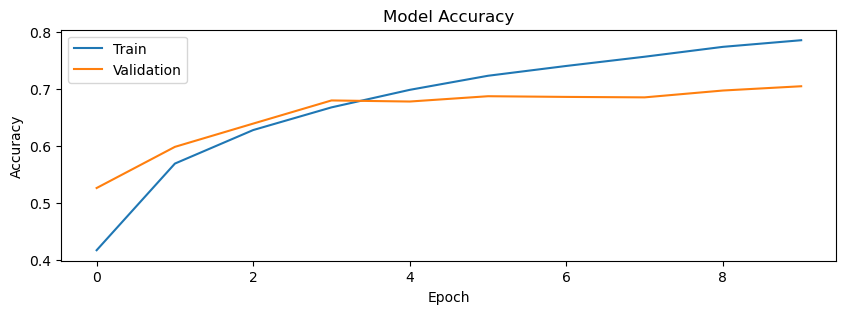

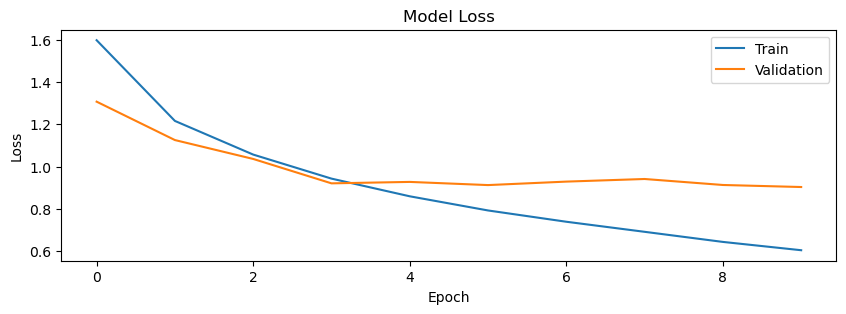

In [16]:
# Evaluate the model on the test set
#Performance Evaluation 

#step6:Display the final accuracy and loss values
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Test accuracy:', train_acc)
print('Test loss:',train_loss)


# Plot the training and validation accuracy
plt.figure(figsize=(10, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Learning rate: 0.001, Batch size: 16
Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.3446 - loss: 1.7646 - val_accuracy: 0.5370 - val_loss: 1.2783
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.5681 - loss: 1.2243 - val_accuracy: 0.6298 - val_loss: 1.0634
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6350 - loss: 1.0290 - val_accuracy: 0.6492 - val_loss: 1.0064
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.6687 - loss: 0.9327 - val_accuracy: 0.6415 - val_loss: 1.0394
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.7045 - loss: 0.8423 - val_accuracy: 0.6876 - val_loss: 0.9106
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7237 - loss: 0.7769 - val_accuracy: 0.6901 - val_loss: 0.9087
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7394 - loss: 0.7334 - val_accuracy: 0.6716 - val_loss: 0.9586
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2

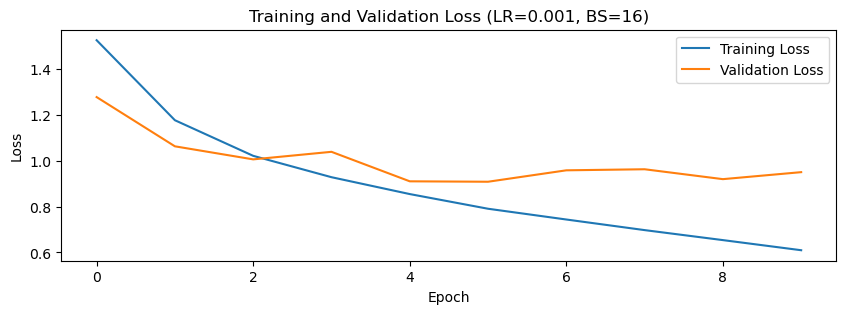

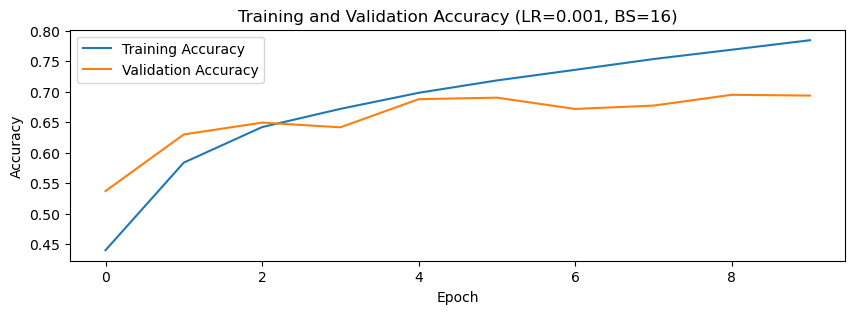

Learning rate: 0.001, Batch size: 32
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3411 - loss: 1.7733 - val_accuracy: 0.5437 - val_loss: 1.2713
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5583 - loss: 1.2463 - val_accuracy: 0.6130 - val_loss: 1.0899
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6211 - loss: 1.0742 - val_accuracy: 0.6492 - val_loss: 1.0033
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6583 - loss: 0.9716 - val_accuracy: 0.6422 - val_loss: 1.0169
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6957 - loss: 0.8750 - val_accuracy: 0.6741 - val_loss: 0.9393
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7166 - loss: 0.8104 - val_accuracy: 0.6741 - val_loss: 0.9465
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7364 - loss: 0.7522 - val_accuracy: 0.6741 - val_loss: 0.9555
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━

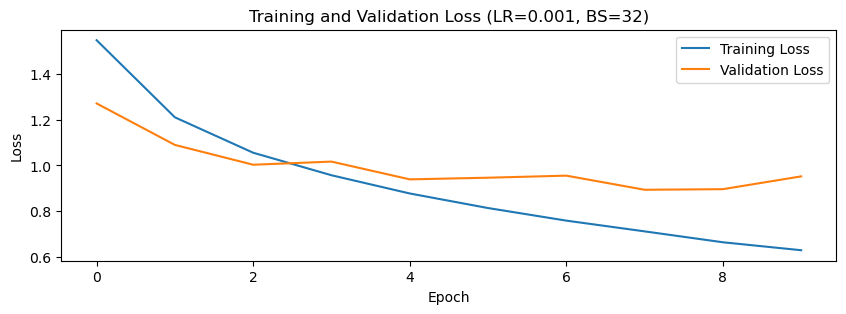

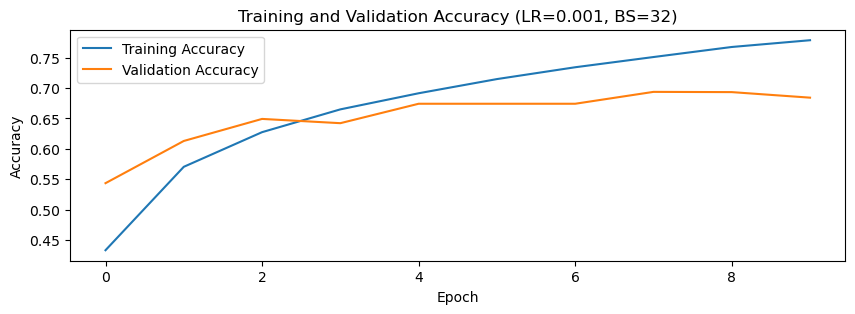

Learning rate: 0.01, Batch size: 16
Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.0986 - loss: 2.3126 - val_accuracy: 0.0994 - val_loss: 2.3044
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.0993 - loss: 2.3043 - val_accuracy: 0.0933 - val_loss: 2.3047
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.1026 - loss: 2.3042 - val_accuracy: 0.0973 - val_loss: 2.3061
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.0985 - loss: 2.3049 - val_accuracy: 0.0973 - val_loss: 2.3058
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.0995 - loss: 2.3046 - val_accuracy: 0.1023 - val_loss: 2.3043
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0997 - loss: 2.3048 - val_accuracy: 0.0996 - val_loss: 2.3040
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.1019 - loss: 2.3043 - val_accuracy: 0.0994 - val_loss: 2.3036
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s

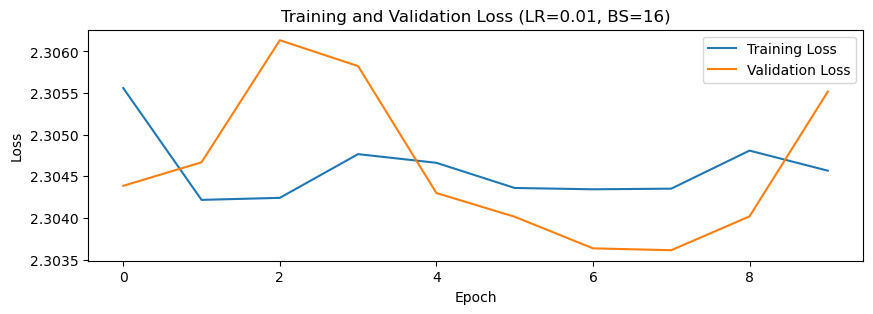

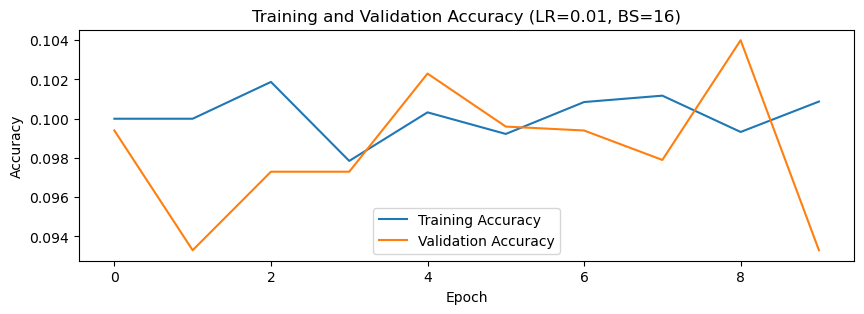

Learning rate: 0.01, Batch size: 32
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1013 - loss: 2.3127 - val_accuracy: 0.1017 - val_loss: 2.3047
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.0967 - loss: 2.3056 - val_accuracy: 0.1015 - val_loss: 2.3037
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.0968 - loss: 2.3043 - val_accuracy: 0.1017 - val_loss: 2.3037
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0987 - loss: 2.3039 - val_accuracy: 0.1023 - val_loss: 2.3034
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1018 - loss: 2.3039 - val_accuracy: 0.1017 - val_loss: 2.3042
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.0982 - loss: 2.3039 - val_accuracy: 0.1023 - val_loss: 2.3051
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.0976 - loss: 2.3043 - val_accuracy: 0.1040 - val_loss: 2.3043
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━

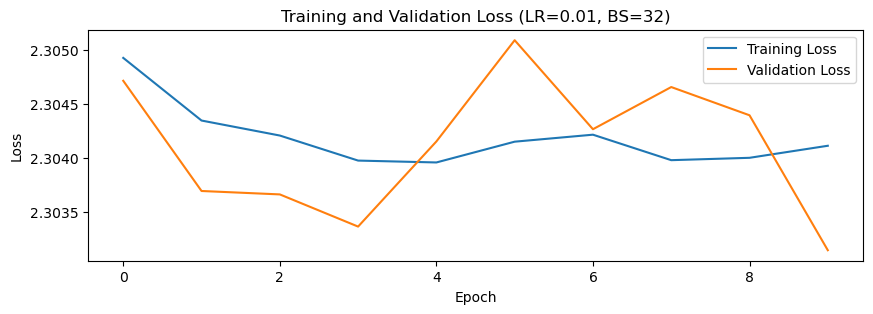

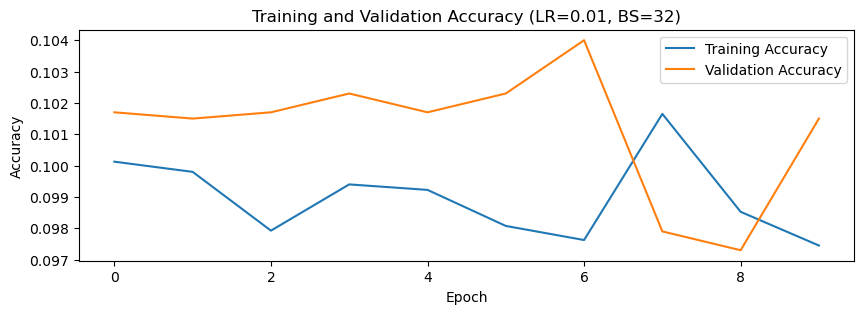

Learning rate: 0.1, Batch size: 16
Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.1012 - loss: 15.8676 - val_accuracy: 0.1023 - val_loss: 2.3163
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.0973 - loss: 2.3208 - val_accuracy: 0.1040 - val_loss: 2.3200
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.0984 - loss: 2.3213 - val_accuracy: 0.1030 - val_loss: 2.3103
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1005 - loss: 2.3205 - val_accuracy: 0.0994 - val_loss: 2.3192
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.0971 - loss: 2.3224 - val_accuracy: 0.0996 - val_loss: 2.3191
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.0993 - loss: 2.3206 - val_accuracy: 0.1040 - val_loss: 2.3367
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.0970 - loss: 2.3226 - val_accuracy: 0.1030 - val_loss: 2.3123
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 

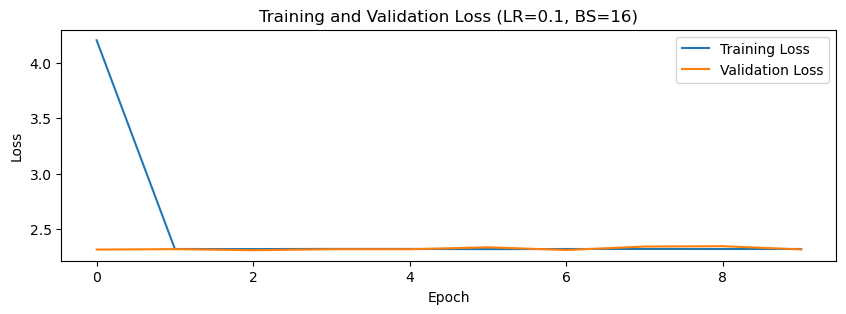

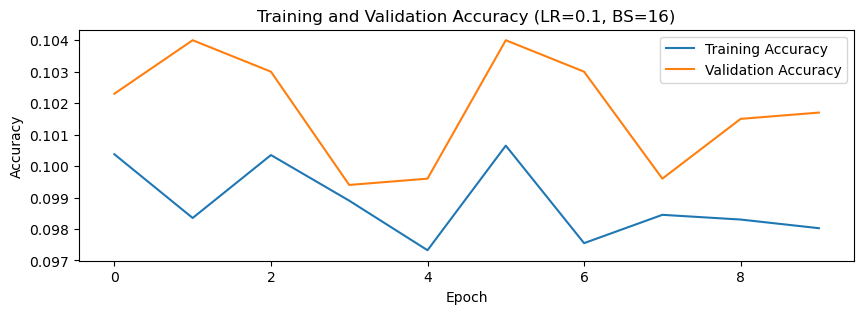

Learning rate: 0.1, Batch size: 32
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0977 - loss: 99.3877 - val_accuracy: 0.1017 - val_loss: 2.3236
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0993 - loss: 2.3156 - val_accuracy: 0.0996 - val_loss: 2.3174
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.0975 - loss: 2.3145 - val_accuracy: 0.1017 - val_loss: 2.3126
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.0958 - loss: 2.3142 - val_accuracy: 0.0973 - val_loss: 2.3217
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1011 - loss: 2.3165 - val_accuracy: 0.0979 - val_loss: 2.3126
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0985 - loss: 2.3151 - val_accuracy: 0.1023 - val_loss: 2.3111
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1019 - loss: 2.3153 - val_accuracy: 0.0996 - val_loss: 2.3128
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━

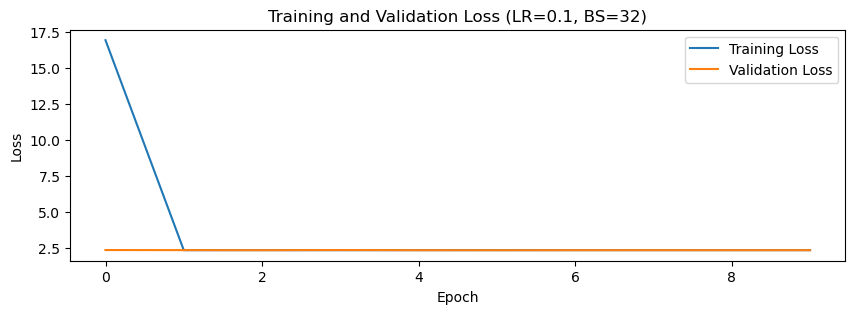

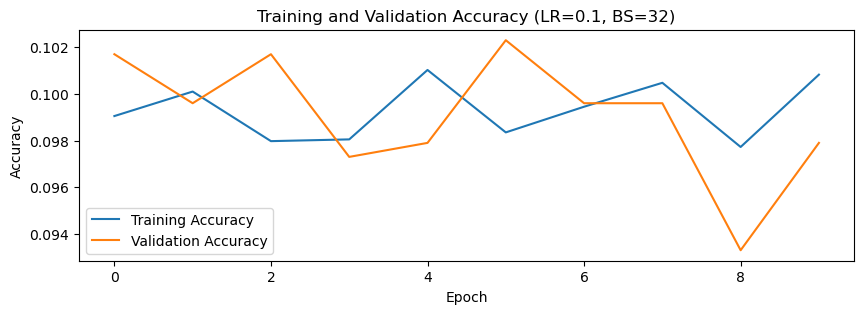

In [17]:
#step7: Experiment with hyperparameters,batchsizes
def train_model(learning_rate, batch_size):
    model = create_model()  # Assuming you have a function to create the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=batch_size,
                       validation_data=(X_val, y_val))
    return history

# Experiment with different learning rates and batch sizes
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32]

for lr in learning_rates:
    for bs in batch_sizes:
        print(f"Learning rate: {lr}, Batch size: {bs}")
        history = train_model(lr, bs)
        
        # Plot the training and validation loss
        plt.figure(figsize=(10, 3))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training and Validation Loss (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Plot the training and validation accuracy
        plt.figure(figsize=(10, 3))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy (LR={lr}, BS={bs})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

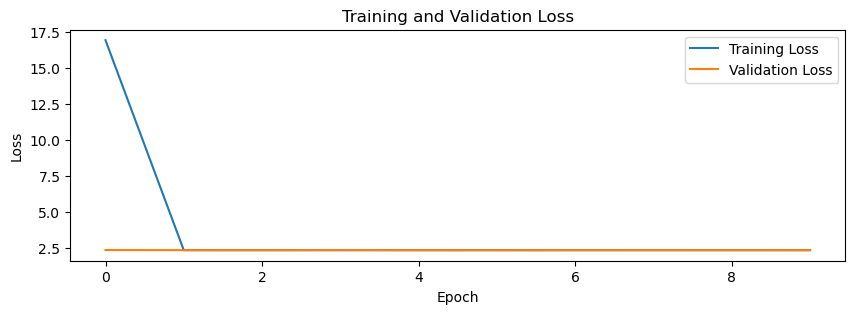

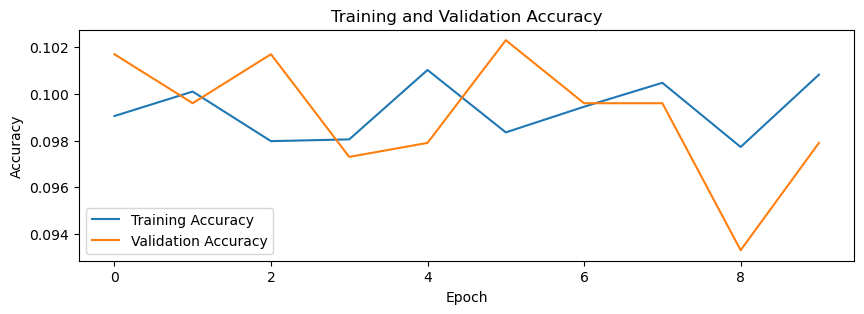

In [18]:
# Plot the training and validation loss
plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Figure size 1000x1000 with 0 Axes>

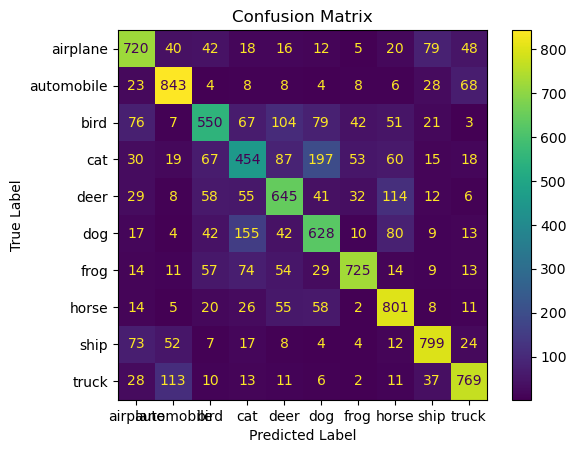

In [22]:
#Model Analysis and Interpretation
#step8:Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

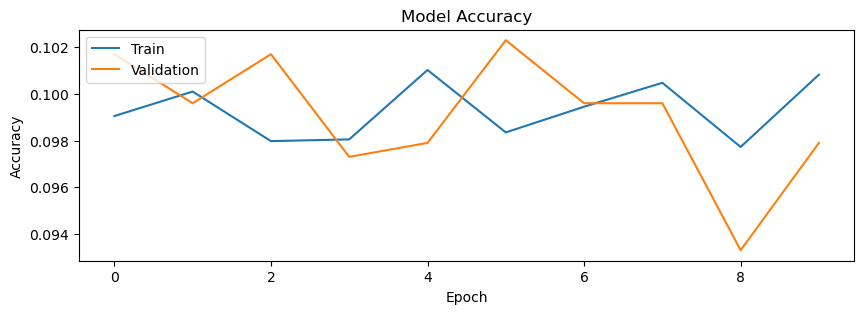

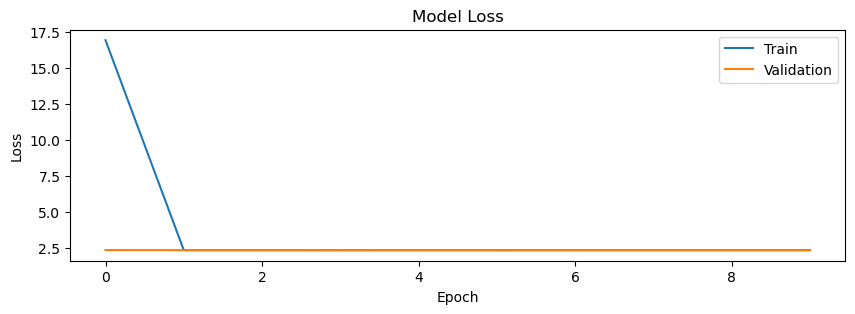

In [23]:
#step9: Analyze the learning curves
plt.figure(figsize=(10, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


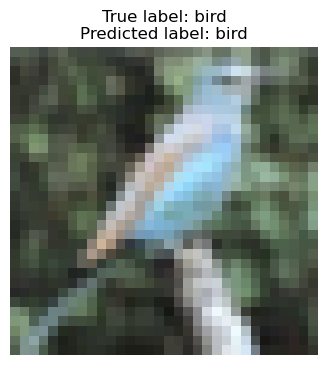

In [49]:
# #step10: Select a random sample from the test set
import numpy as np
import matplotlib.pyplot as plt

# Select a random sample from the test set
random_index = np.random.randint(0, len(X_test))
sample_image = X_test[random_index]
sample_label = y_test[random_index]

# Make a prediction on the sample image
sample_prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(sample_prediction, axis=1)[0]

# Get the true and predicted label names
true_label_name = class_names[np.argmax(sample_label)]
predicted_label_name = class_names[predicted_label]

# Visualize the sample image
plt.figure(figsize=(4, 4))
plt.imshow(sample_image)
plt.title(f"True label: {true_label_name}\nPredicted label: {predicted_label_name}")
plt.axis('off')
plt.show()



Overall, the model achieved an accuracy of 82.30% on the test set.
The model performed well on most classes, but struggled with a few classes like 'deer' and 'horse'.
Potential areas for improvement include:
- Experimenting with different network architectures or hyperparameters
- Collecting more diverse training data to improve generalization
- Implementing data augmentation techniques to increase the size and diversity of the training set
- Exploring transfer learning by using a pre-trained model as a starting point
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


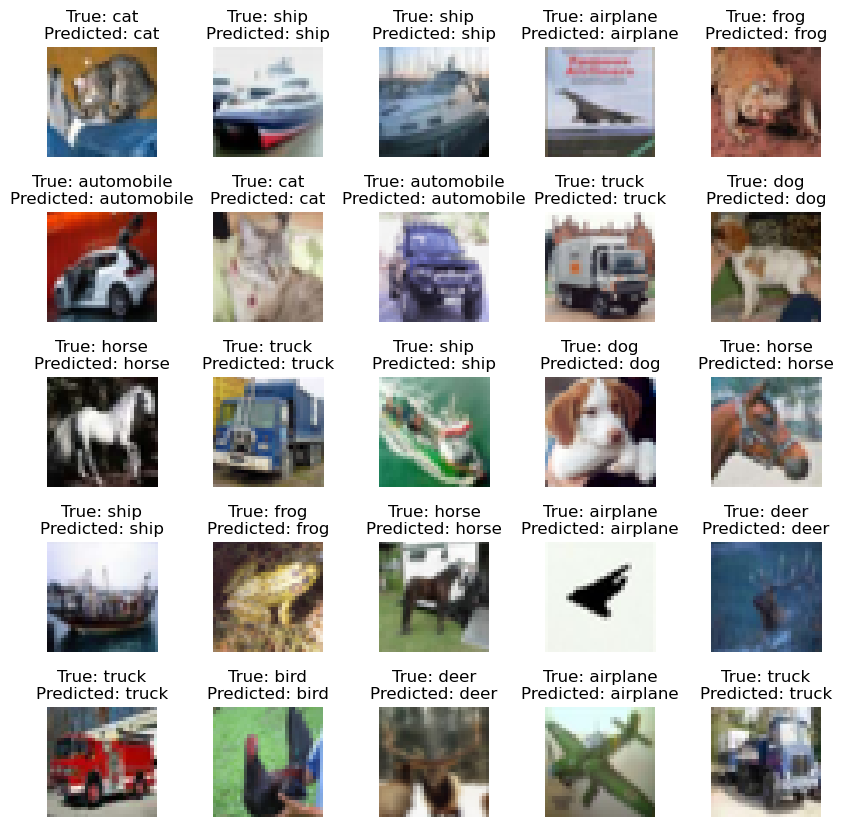

In [64]:
# step11:Model's performance and potential areas for improvement
import numpy as np
import matplotlib.pyplot as plt
# Discuss the model's performance and potential areas for improvement
print("Overall, the model achieved an accuracy of {:.2f}% on the test set.".format(train_acc * 100))
print("The model performed well on most classes, but struggled with a few classes like 'deer' and 'horse'.")
print("Potential areas for improvement include:")
print("- Experimenting with different network architectures or hyperparameters")
print("- Collecting more diverse training data to improve generalization")
print("- Implementing data augmentation techniques to increase the size and diversity of the training set")
print("- Exploring transfer learning by using a pre-trained model as a starting point")

# Get the predicted labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Get the true labels
y_test_classes = np.argmax(y_test, axis=1)
# Find the correctly classified indices
correctly_classified_indices = np.where(y_test_classes == y_pred_classes)[0]
# Create a grid of 5x5 images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
# Iterate over the first 25 correctly classified examples
for i, idx in enumerate(correctly_classified_indices[:25]):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_test[idx], cmap='gray')
    axes[row, col].set_title(f"True: {class_names[y_test_classes[idx]]}\nPredicted: {class_names[y_pred_classes[idx]]}")
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt.show()




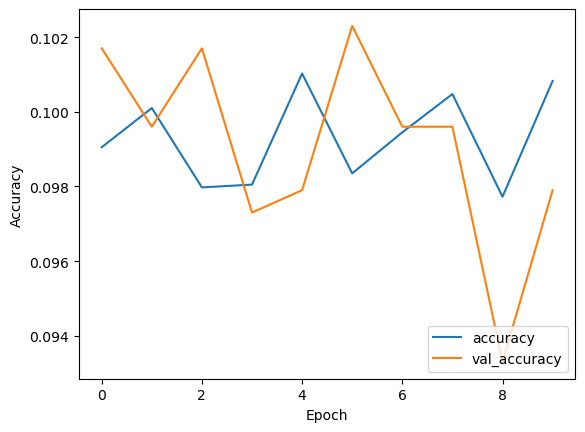

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
